## 순환신경망 구현 및 학습

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/toojey7/anaconda3/envs/mldl/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 하이퍼 파라미터

In [2]:
EPOCHS = 10
NUM_WORDS = 10000

## 모델 정의

In [3]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.emb=tf.keras.layers.Embedding(NUM_WORDS,16) #embedding?  길이가 32인 숫자 나열 형태를 그대로 학습하는 것은 좋지 않다 
        self.lstm=tf.keras.layers.LSTM(32)
        self.dense=tf.keras.layers.Dense(1,activation='sigmoid')
        
    def call(self,x,training=None,mask=None):
        x=self.emb(x)
        x=self.lstm(x)
        return self.dense(x)

## 데이터셋 준비


In [4]:
imdb=tf.keras.datasets.imdb #영화 평론에 대한 데이터
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=NUM_WORDS) #x_train은 문장으로 이루어져 있고, y_train은 긍정/부정 즉 binary형태의 data, num_words을 통해 문장에 사용되는 단어의 개수 제한
print(len(x_train[0]),len(x_train[1]))
# x_train은 길이가 다양한 문장이다. -> 그래서를 이를 길이가 32인 문장들로 만들어 주었다.
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,value=0,padding='pre',maxlen=32) #길이가 32인 문장이 되도록 전처리 작업 진행, 만약 길이가 32보다 작은 경우에 대해서는 앞에 0으로 padding
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,value=0,padding='pre',maxlen=32)

train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(1000).batch(32)
test_ds=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

17465344/17464789 [==============================] - 0s 0us/step
218 189


In [5]:
print(x_train[0])

[  30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103   32   15   16
 5345   19  178   32]


## 모델 생성

In [6]:
model = MyModel()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 학습 루프 동작

In [8]:
history=model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Train for 782 steps, validate for 782 steps
Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0527 - accuracy: 0.9827 - val_loss: 1.2802 - val_accuracy: 0.7556
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 1.4196 - val_accuracy: 0.7471
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0408 - accuracy: 0.9866 - val_loss: 1.3267 - val_accuracy: 0.7431
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 1.4777 - val_accuracy: 0.7467
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 1.5929 - val_accuracy: 0.7494
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0239 - accuracy: 0.9935 - val_loss: 1.7106 - val_accuracy: 0.7452
Epoch 7/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0202 - accuracy: 0.9941 - va

Text(0.5, 1.0, 'Training and Validation Loss')

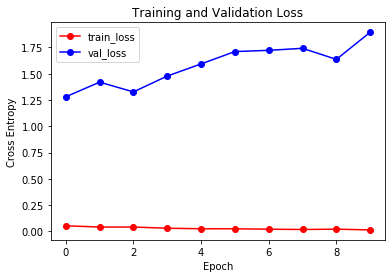

In [12]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') # r->read o->circle points - ->point connected with lines
plt.plot(val_loss,'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['train_loss','val_loss'])
plt.title('Training and Validation Loss')

In [9]:
print(max(history.history['val_accuracy']))

0.7556


## GRU(Gated Recurrent Unit)

In [13]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.emb=tf.keras.layers.Embedding(NUM_WORDS,16) #embedding?  길이가 32인 숫자 나열 형태를 그대로 학습하는 것은 좋지 않다 각각의 NUM_WORDS에 대해서 16 길이의 벡터로 만들어진다.? 독립성 유지??
        self.gru=tf.keras.layers.GRU(32)
        self.dense=tf.keras.layers.Dense(1,activation='sigmoid')
        
    def call(self,x,training=None,mask=None):
        x=self.emb(x)
        x=self.gru(x)
        return self.dense(x)
model = MyModel()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history=model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Train for 782 steps, validate for 782 steps
Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5071 - accuracy: 0.7354 - val_loss: 0.4506 - val_accuracy: 0.7853
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3758 - accuracy: 0.8314 - val_loss: 0.4507 - val_accuracy: 0.7868
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.3276 - accuracy: 0.8592 - val_loss: 0.4807 - val_accuracy: 0.7787
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2861 - accuracy: 0.8843 - val_loss: 0.5295 - val_accuracy: 0.7697
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2407 - accuracy: 0.9044 - val_loss: 0.5595 - val_accuracy: 0.7695
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2005 - accuracy: 0.9258 - val_loss: 0.6500 - val_accuracy: 0.7648
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1616 - accuracy: 0.9422 - v

Text(0.5, 1.0, 'Training and Validation Loss')

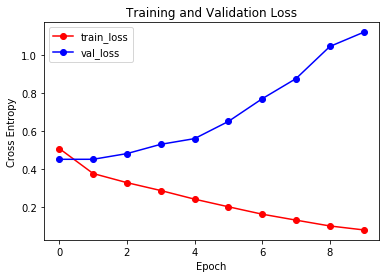

In [15]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') # r->read o->circle points - ->point connected with lines
plt.plot(val_loss,'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['train_loss','val_loss'])
plt.title('Training and Validation Loss')

In [17]:
print(max(history.history['val_accuracy']))

0.78684


## Vanilla RNN

In [18]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.emb=tf.keras.layers.Embedding(NUM_WORDS,16) #embedding?  길이가 32인 숫자 나열 형태를 그대로 학습하는 것은 좋지 않다 
        self.rnn=tf.keras.layers.SimpleRNN(32)
        self.dense=tf.keras.layers.Dense(1,activation='sigmoid')
        
    def call(self,x,training=None,mask=None):
        x=self.emb(x)
        x=self.rnn(x)
        return self.dense(x)
model = MyModel()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history=model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS)

Train for 782 steps, validate for 782 steps
Epoch 1/10
782/782 [==============================] - 17s 22ms/step - loss: 0.5439 - accuracy: 0.7082 - val_loss: 0.4536 - val_accuracy: 0.7867
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3623 - accuracy: 0.8432 - val_loss: 0.4880 - val_accuracy: 0.7718
Epoch 3/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2306 - accuracy: 0.9085 - val_loss: 0.5974 - val_accuracy: 0.7608
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.1121 - accuracy: 0.9620 - val_loss: 0.7695 - val_accuracy: 0.7541
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.9605 - val_accuracy: 0.7412
Epoch 6/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 1.1302 - val_accuracy: 0.7406
Epoch 7/10
782/782 [==============================] - 16s 21ms/step - loss: 0.0175 - accurac

Text(0.5, 1.0, 'Training and Validation Loss')

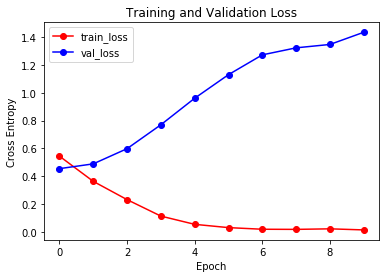

In [20]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure()
plt.plot(loss,'ro-') # r->read o->circle points - ->point connected with lines
plt.plot(val_loss,'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(['train_loss','val_loss'])
plt.title('Training and Validation Loss')

In [21]:
print(max(history.history['val_accuracy']))

0.78672
